<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/retrieve_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieving OpenStreetMap data

![](https://github.com/Automating-GIS-processes/site/blob/master/source/notebooks/L6/img/OSM_logo.png?raw=1)

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment.
It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 5 billion nodes and counting! ([stats from November 2019](http://wiki.openstreetmap.org/wiki/Stats)).

OpenStreetMap is used not only for integrating the **OSM maps** as background maps to visualizations or online maps, but also for many other purposes such as **routing**, **geocoding**, **education**, and **research**. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org).


## Main tools in this lesson

### OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

> Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004


[This tutorial](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb) provides a practical overview of OSMnx functionalities, and has also inspired this AutoGIS lesson.

*Note: major changes were implemented in OSMnx versions > 0.9. This lesson has been updated accordingly.*

</div>

### NetworkX

We will also use [NetworkX](https://networkx.github.io/documentation/stable/) to for manipulating and analyzing the street network data retrieved from OpenSTreetMap. NetworkX is a Python package that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate [shortest paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)
along road networks using e.g. [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API) in the background. In this tutorial, we will learn how to download and visualize the street network and additional data from OpenStreetMap covering a specified area of interest.

### Street network

The [osmnx.graph -module](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from#module-osmnx.graph) enables downloading and constructing a routable road network graph based on user-defined area of interest. The user can specify the area of interest, for example using a placename, a bounding box or a polygon. Here, we will use a placename for fetching data from the the city area in Papua New Guinea. In the place name query, OSMnx uses the Nominatim Geocoding API.

In [ ]:
# Install dependencies, uncomment if required

!pip install geopandas
!pip install osmnx

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

Let's start by specifying ``"National Capital District, Papua New Guinea"`` as the place from where the data should be downloaded. The place name should be *geocodable* which means that the place name should exist in the OpenStreetMap database (you can do a test search at https://www.openstreetmap.org/ or at https://nominatim.openstreetmap.org/ to verify that the place name is valid).  

In [6]:
# Specify the name that is used to seach for the data
place_name = "National Capital District, Papua New Guinea"

Next, we will read in the OSM street network using OSMnx using the [graph_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph%20from#osmnx.graph.graph_from_place) function:

In [7]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

Check the data type of the graph:

In [8]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a networkx [MultiDiGraph](https://networkx.org/documentation/networkx-1.10/reference/classes.multidigraph.html) object. 

Let's have a closer look a the street nework. OSMnx has its own function [plot_graph()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=plot_graph#osmnx.plot.plot_graph) for visualizing graph objects. The function utilizes Matplotlib for visualizing the data,
hence as a result it returns a matplotlib figure and axis objects:


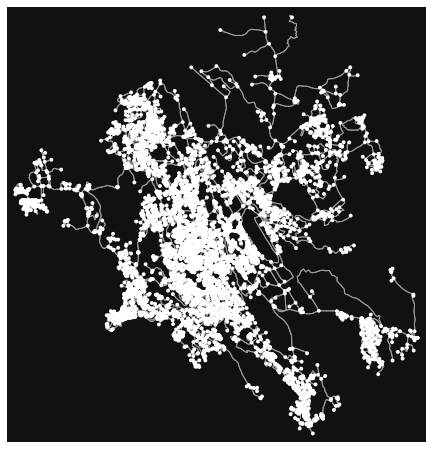

In [9]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Great! Now we can see that our graph contains nodes (the points) and edges (the lines) that connects those nodes to each other.


### Graph to GeoDataFrame

We can now plot all these different OSM layers by using the familiar `plot()` function of geopandas. As you might remember, the street network data is not a GeoDataFrame, but a graph object. Luckily, OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let's extract the nodes and edges from the graph as GeoDataFrames:

In [10]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [11]:
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
100900619,-9.450427,147.196069,3,NaN,POINT (147.19607 -9.45043)
103908253,-9.477998,147.160780,3,NaN,POINT (147.16078 -9.47800)
103909535,-9.477840,147.174771,4,motorway_junction,POINT (147.17477 -9.47784)
103909538,-9.480551,147.180800,3,NaN,POINT (147.18080 -9.48055)
106777747,-9.437618,147.207712,4,NaN,POINT (147.20771 -9.43762)


In [12]:
edges.head()

osmid  highway    junction  oneway   length  \
u         v          key                                                    
100900619 8867383465 0    808148828    trunk  roundabout    True  111.777   
103908253 274885176  0     11636292  primary         NaN   False   80.274   
          3630321129 0    357957076  primary         NaN    True   38.453   
103909535 3733974284 0     11636415  primary         NaN   False  161.519   
          6439628463 0     11636415  primary         NaN   False  230.365   

                                                                   geometry  \
u         v          key                                                      
100900619 8867383465 0    LINESTRING (147.19607 -9.45043, 147.19617 -9.4...   
103908253 274885176  0    LINESTRING (147.16078 -9.47800, 147.16089 -9.4...   
          3630321129 0    LINESTRING (147.16078 -9.47800, 147.16076 -9.4...   
103909535 3733974284 0    LINESTRING (147.17477 -9.47784, 147.17352 -9.4...   
          6439628463 0    LINESTRING (147.17477 -9.47784, 147.17603 -9.4...   

                                     name lanes service access  ref bridge  \
u         v          key                                                     
100900619 8867383465 0                NaN   NaN     NaN    NaN  NaN    NaN   
103908253 274885176  0         Lawes Road   NaN     NaN    NaN  NaN    NaN   
          3630321129 0         Lawes Road   NaN     NaN    NaN  NaN    NaN   
103909535 3733974284 0    Scratchley Road     2     NaN    NaN  NaN    NaN   
          6439628463 0    Scratchley Road     2     NaN    NaN  NaN    NaN   

                         maxspeed width tunnel  
u         v          key                        
100900619 8867383465 0        NaN   NaN    NaN  
103908253 274885176  0        NaN   NaN    NaN  
          3630321129 0        NaN   NaN    NaN  
103909535 3733974284 0        NaN   NaN    NaN  
          6439628463 0        NaN   NaN    NaN

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

### Place polygon

Let's also plot the Polygon that represents our area of interest (the city). We can retrieve the Polygon geometry using the [geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) -function.

In [13]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

As the name of the function already tells us, it returns a GeoDataFrame object based on the specified place name query.
Let's still verify the data type: 

In [14]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Let's also have a look at the data:

In [15]:
# Check data values
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((147.09765 -9.42084, 147.09784 -9.429...",-9.332459,-9.54379,147.296901,147.097648,282354291,relation,269423,-9.416667,147.166667,"National Capital District, Southern Region, Pa...",boundary,administrative,0.766904


<AxesSubplot:>

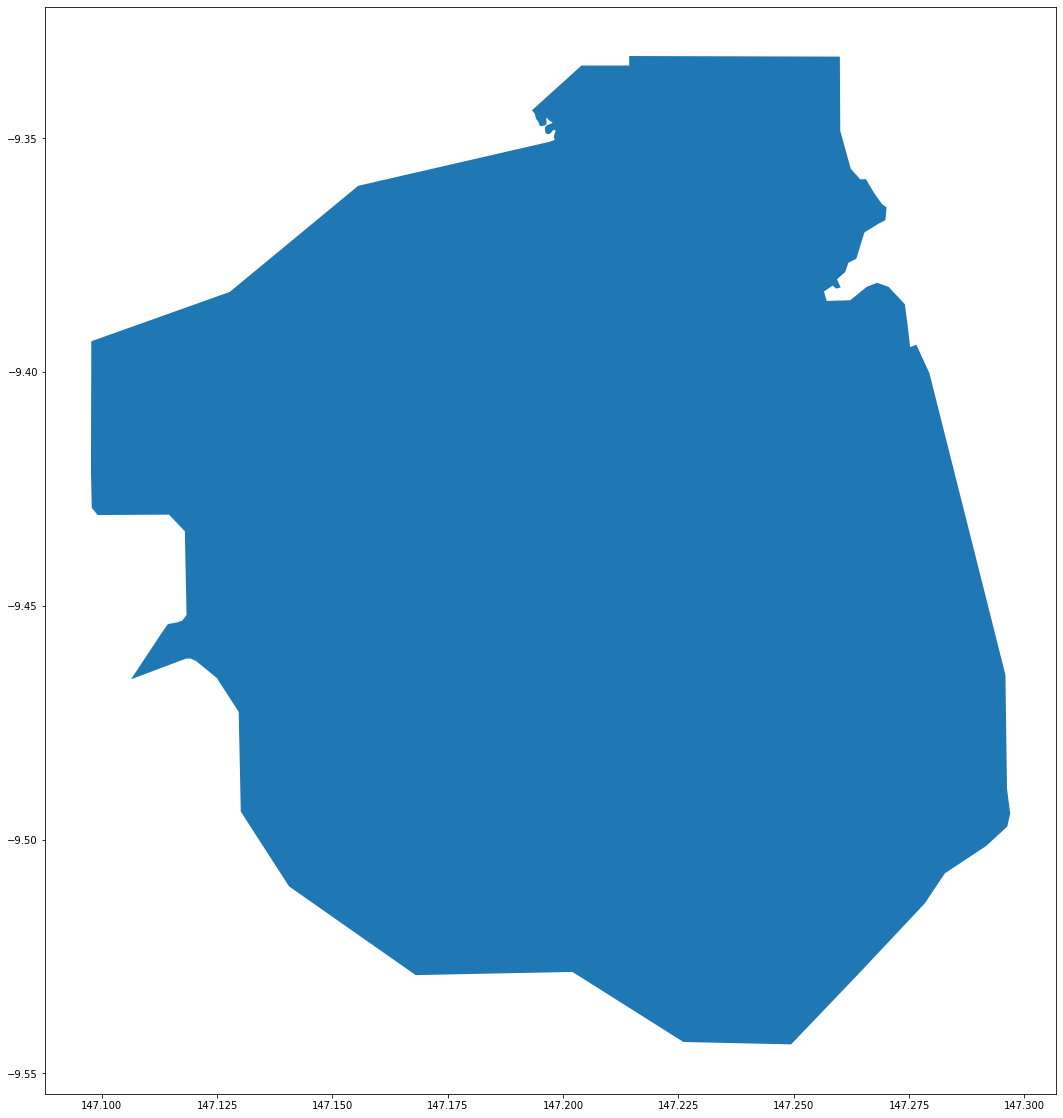

In [35]:
# Plot the area:
area.plot(figsize=(30,20))

### Building footprints

It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let's download the buildings with `OSMnx` [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) -function and plot them on top of our street network in the city. 

When fetching spesific types of geometries from OpenStreetMap using OSMnx `geometries_from_place` we also need to specify the correct tags. For getting [all types of buildings](https://wiki.openstreetmap.org/wiki/Buildings), we can use the tag `building=yes`.

In [17]:
# List key-value pairs for tags
tags = {'building': True}

In [18]:
buildings = ox.geometries_from_place(place_name, tags)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


Let's check how many building footprints we received:

In [19]:
len(buildings)

10758

Let's also have a look at the data:

In [20]:
buildings.head()

addr:housename building  \
element_type osmid                                
node         2843240344    EG Building   office   
             2843241093           PMGO   office   
             3630270316            NaN   public   
             3630270321            NaN   public   
             6031023439            NaN      yes   

                                                                      name  \
element_type osmid                                                           
node         2843240344  Department of Mineral Policy and Geohazards Ma...   
             2843241093               Port Moresby Geophysical Observatory   
             3630270316                                     Cargo Terminal   
             3630270321                             Royal Papua Yatch Club   
             6031023439                                          APEC Haus   

                               source                    geometry addr:city  \
element_type osmid                                                            
node         2843240344  Bing imagery  POINT (147.16250 -9.46956)       NaN   
             2843241093          Bing  POINT (147.16106 -9.47129)       NaN   
             3630270316           NaN  POINT (147.15159 -9.47421)       NaN   
             3630270321           NaN  POINT (147.15478 -9.46637)       NaN   
             6031023439           NaN  POINT (147.15062 -9.48319)       NaN   

                        addr:country addr:housenumber addr:postcode  \
element_type osmid                                                    
node         2843240344          NaN              NaN           NaN   
             2843241093          NaN              NaN           NaN   
             3630270316          NaN              NaN           NaN   
             3630270321          NaN              NaN           NaN   
             6031023439          NaN              NaN           NaN   

                        addr:street  ... self_service bus_bay lockable  \
element_type osmid                   ...                                 
node         2843240344         NaN  ...          NaN     NaN      NaN   
             2843241093         NaN  ...          NaN     NaN      NaN   
             3630270316         NaN  ...          NaN     NaN      NaN   
             3630270321         NaN  ...          NaN     NaN      NaN   
             6031023439         NaN  ...          NaN     NaN      NaN   

                        residential diet:meat diet:vegetarian landcover craft  \
element_type osmid                                                              
node         2843240344         NaN       NaN             NaN       NaN   NaN   
             2843241093         NaN       NaN             NaN       NaN   NaN   
             3630270316         NaN       NaN             NaN       NaN   NaN   
             3630270321         NaN       NaN             NaN       NaN   NaN   
             6031023439         NaN       NaN             NaN       NaN   NaN   

                        ways type  
element_type osmid                 
node         2843240344  NaN  NaN  
             2843241093  NaN  NaN  
             3630270316  NaN  NaN  
             3630270321  NaN  NaN  
             6031023439  NaN  NaN  

[5 rows x 138 columns]

<AxesSubplot:>

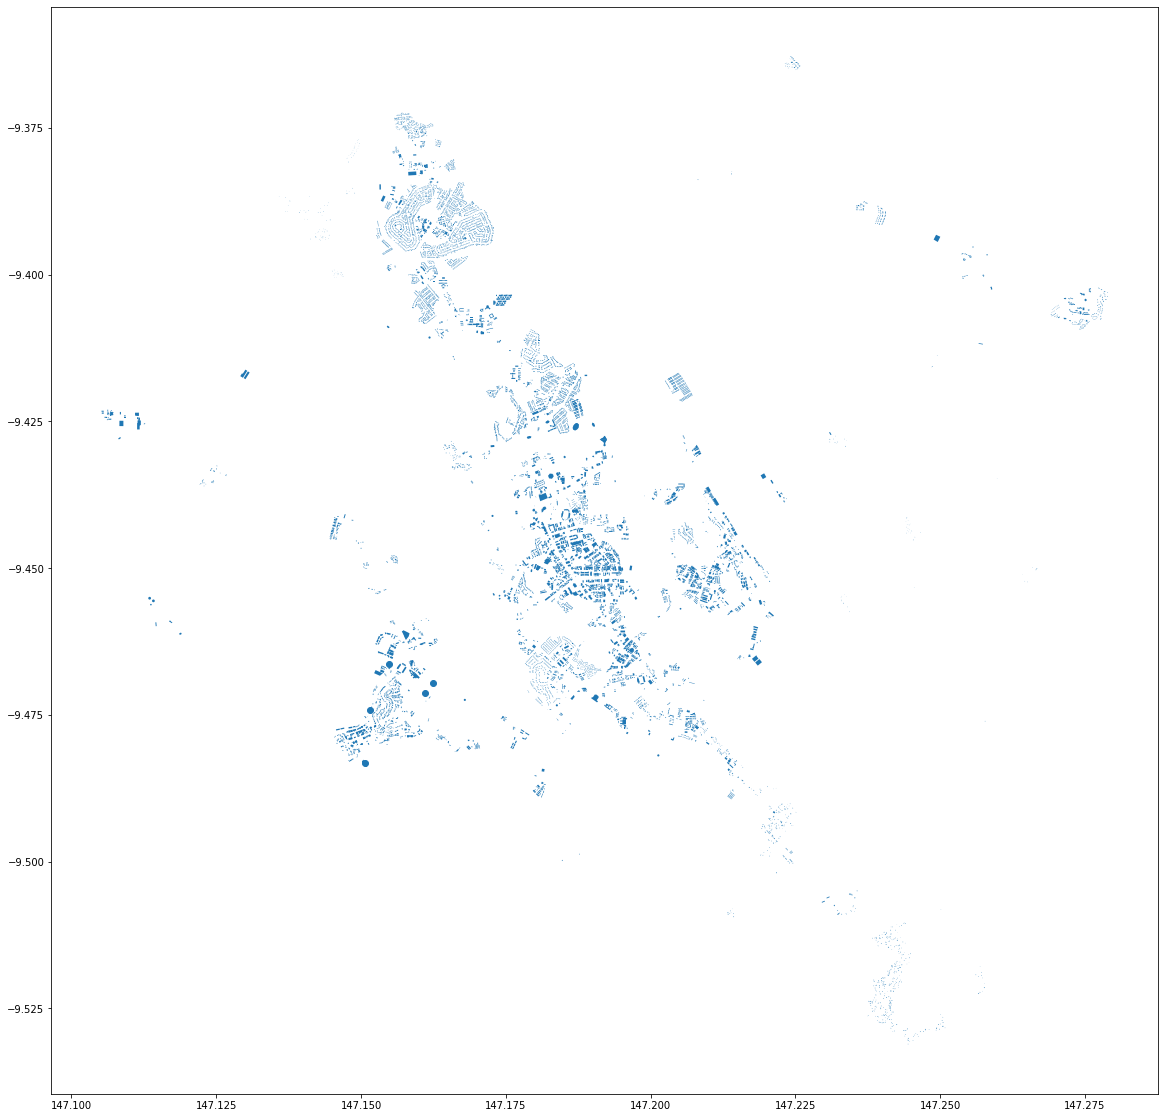

In [34]:
buildings.plot(figsize=(30,20))

As you can see, there are several columns in the buildings-layer. Each column contains information about a spesific tag that OpenStreetMap contributors have added. Each tag consists of a key (the column name), and several potential values (for example `building=yes` or `building=school`). Read more about tags and tagging practices in the [OpenStreetMap wiki](https://wiki.openstreetmap.org/wiki/Tags). 

In [21]:
buildings.columns

Index(['addr:housename', 'building', 'name', 'source', 'geometry', 'addr:city',
       'addr:country', 'addr:housenumber', 'addr:postcode', 'addr:street',
       ...
       'self_service', 'bus_bay', 'lockable', 'residential', 'diet:meat',
       'diet:vegetarian', 'landcover', 'craft', 'ways', 'type'],
      dtype='object', length=138)

### Points-of-interest

It is also possible to retrieve other types of geometries from OSM using the `geometries_from_place` by passing different tags. Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest. 

In OpenStreetMap, many POIs are described using the [amenity-tags](https://wiki.openstreetmap.org/wiki/Key:amenityhttps://wiki.openstreetmap.org/wiki/Key:amenity). 
We can, for excample, retrieve all restaurat locations by referring to the tag `amenity=restaurant`. See all available amenity categories from [OSM wiki](https://wiki.openstreetmap.org/wiki/Key:amenity). 

*Note: We used the `pois_from_place()` method to retrieve POIs in older versions of OSMnx.*

Let's retrieve restaurants that are located in our area of interest:

In [22]:
# List key-value pairs for tags
tags = {'amenity': 'restaurant'}

In [23]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

13

As we can see, there are quite many restaurants in the area.

Let's explore what kind of attributes we have in our restaurants GeoDataFrame:

In [27]:
# Available columns
restaurants.columns.values

array(['amenity', 'name', 'website', 'geometry', 'internet_access',
       'name:en', 'opening_hours', 'cuisine', 'brewery:note', 'addr:city',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'capacity',
       'delivery', 'diet:gluten_free', 'diet:meat', 'diet:organic',
       'diet:pescetarian', 'diet:vegetarian', 'email', 'outdoor_seating',
       'phone', 'smoking', 'opening_hours:covid19', 'diet:healthy',
       'nodes', 'building', 'building:facade:colour', 'height',
       'roof:colour', 'roof:height', 'roof:shape', 'building:levels'],
      dtype=object)

As you can see, there is quite a lot of (potential) information related to the amenities. Let's subset the columns and inspect the data further. Useful columns include at least `name`, `address information` and `opening_hours` information:

In [33]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:housenumber', 'addr:postcode', 'addr:street']

# Print only selected cols
restaurants[cols].head(10)

name  \
element_type osmid                                             
node         1360231673  Airways Hotel - Poolside Restaurant   
             4551546489                             Bel Cibo   
             4605004389                     Hogs Breath Cafe   
             4727758790                      Buffalo Burgers   
             5853188186              Magi Seafood Restaurant   
             8690104768    Wellness Village Kitchen and Cafe   
             8889325814                        Diner's Place   
             9000002954                  Hideaway Restaurant   
             9000309040                                  NaN   
             9024116013                  Alibi Bar and Grill   

                             opening_hours     addr:city   addr:housenumber  \
element_type osmid                                                            
node         1360231673                NaN           NaN                NaN   
             4551546489  Mo-Su 09:00-21:00           NaN                NaN   
             4605004389                NaN           NaN                NaN   
             4727758790                NaN           NaN                NaN   
             5853188186                NaN           NaN                NaN   
             8690104768  Mo-Su 08:00-22:00  Port Moresby  Section 21 lot 28   
             8889325814  Mo-Sa 08:00-18:00  Port Moresby                NaN   
             9000002954  Mo-Su 08:00-23:00           NaN                NaN   
             9000309040                NaN           NaN                NaN   
             9024116013  Mo-Sa 08:00-18:00  Port Moresby                NaN   

                        addr:postcode        addr:street  
element_type osmid                                        
node         1360231673           NaN                NaN  
             4551546489           NaN                NaN  
             4605004389           NaN                NaN  
             4727758790           NaN                NaN  
             5853188186           NaN                NaN  
             8690104768           111      Vaivai Avenue  
             8889325814           NaN     Douglas Street  
             9000002954           NaN        Tamara Road  
             9000309040           NaN                NaN  
             9024116013           NaN  Stanley Esplanade

As we can see, there is a lot of useful information about restaurants that can be retrieved easily with OSMnx. Also, if some of the information need updating, you can go over to www.openstreetmap.org and edit the source data! :)

### Plotting the data

Let's create a map out of the streets, buildings, restaurants, and the area Polygon but let's exclude the nodes (to keep the figure clearer).

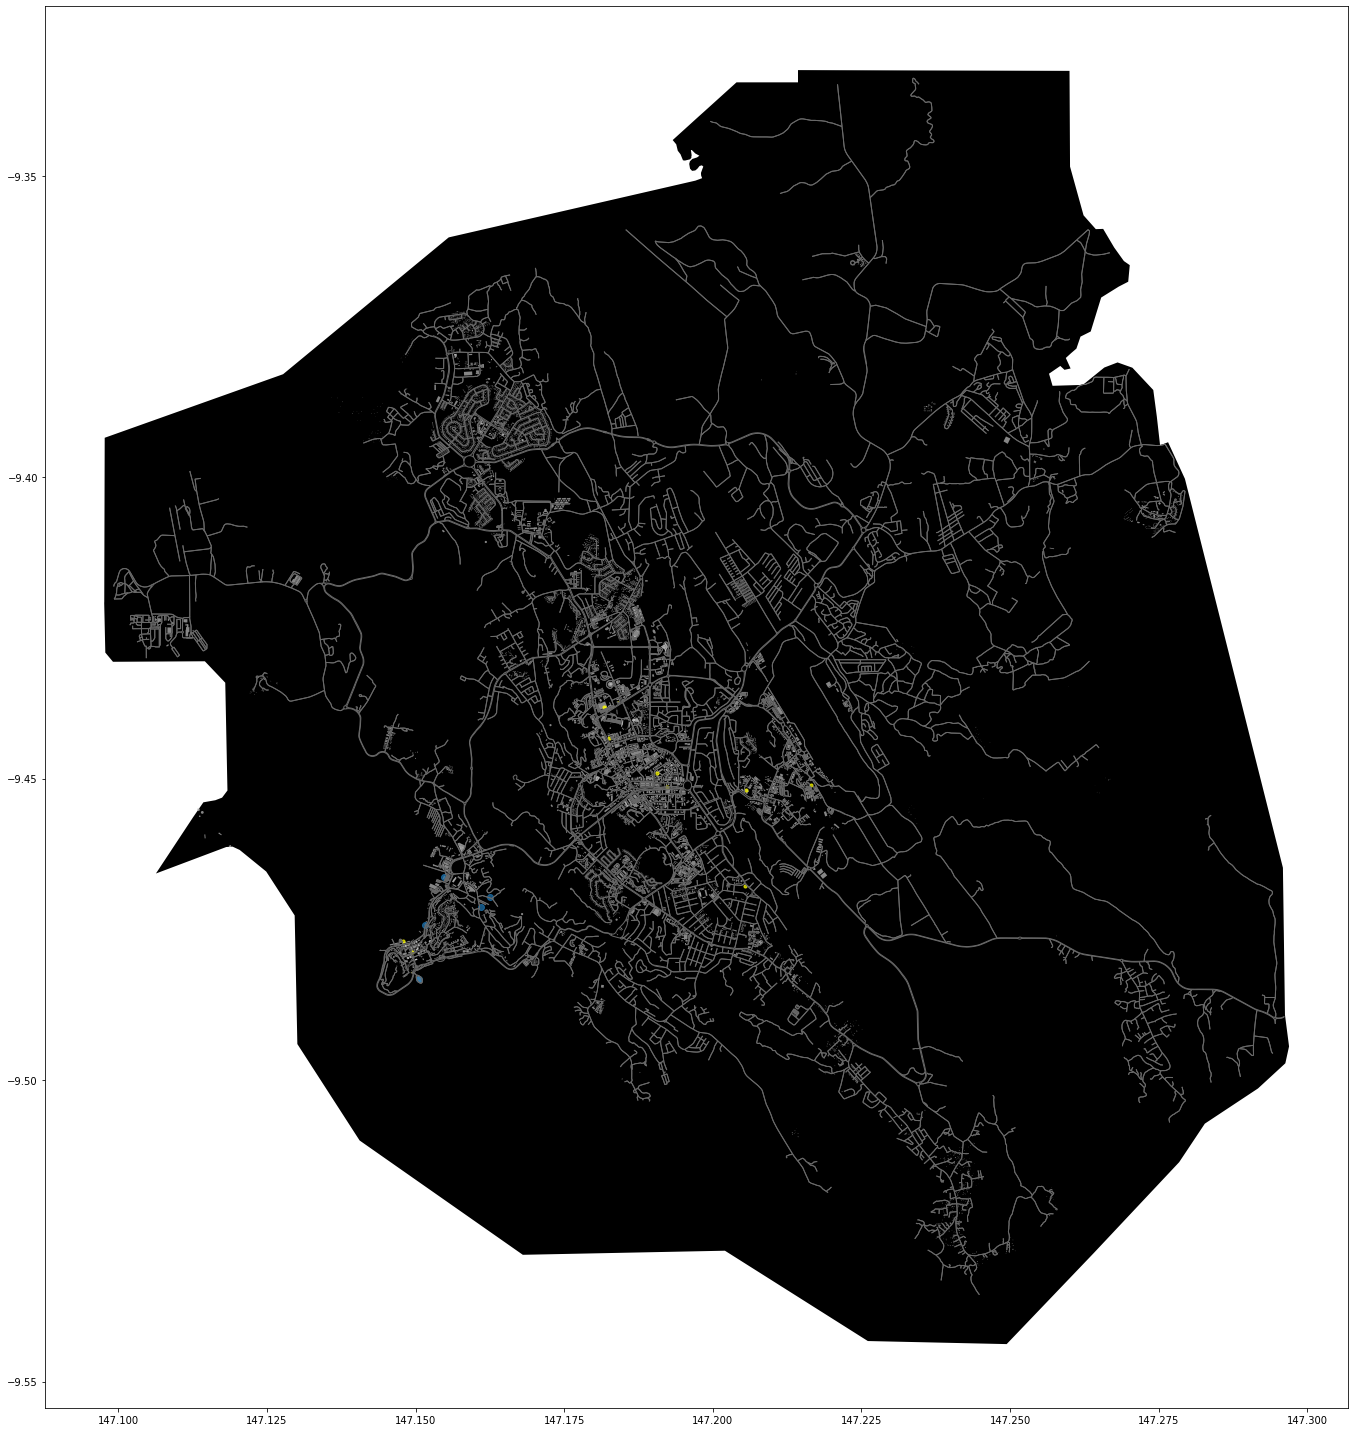

In [30]:
fig, ax = plt.subplots(figsize=(30,20))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

Cool! Now we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of 'the city'. And all of this required only a few lines of code. Pretty neat! 


### Extra: Park polygons
Notice that we can retrieve all kinds of different features from OpenStreetMap using the [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) method by passing different OpenStreetMap tags.

Let's try to fetch all public parks in the the city area. In OpenStreetMap, parks are often tagged as `leisure=park`. We can also add other green surfaces, such as `landuse=grass`. see OpenStreetMap, and OSM wiki for more details.

- We need to start by fetching all footprints from the tag `leisure`:

In [36]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}

In [37]:
# Get the data
parks = ox.geometries_from_place(place_name, tags)

# Check the result
print("Retrieved", len(parks), "objects")

Retrieved 94 objects


let's check the first rows:

In [38]:
parks.head(3)

leaf_cycle leaf_type  \
element_type osmid                           
way          25158959        NaN       NaN   
             25159049        NaN       NaN   
             25456894        NaN       NaN   

                                                                geometry  \
element_type osmid                                                         
way          25158959  POLYGON ((147.15140 -9.47905, 147.15157 -9.479...   
             25159049  POLYGON ((147.14919 -9.48039, 147.14925 -9.480...   
             25456894  POLYGON ((147.19302 -9.46892, 147.19217 -9.469...   

                                                                   nodes  \
element_type osmid                                                         
way          25158959  [274259549, 274259550, 274259551, 274259552, 2...   
             25159049  [274260961, 274260962, 8879062339, 8879062340,...   
             25456894  [277411485, 277411487, 277411488, 277411489, 2...   

                      leisure             name     created_by addr:city  \
element_type osmid                                                        
way          25158959    park              NaN            NaN       NaN   
             25159049    park  Coronation Park            NaN       NaN   
             25456894    park      Minihi Park  Potlatch 0.9c       NaN   

                      addr:street landcover landuse opening_hours operator  \
element_type osmid                                                           
way          25158959         NaN       NaN     NaN           NaN      NaN   
             25159049         NaN       NaN     NaN           NaN      NaN   
             25456894         NaN       NaN     NaN           NaN      NaN   

                      surface website area  
element_type osmid                          
way          25158959     NaN     NaN  NaN  
             25159049     NaN     NaN  NaN  
             25456894     NaN     NaN  NaN

Check all column headers:

In [39]:
parks.columns.values

array(['leaf_cycle', 'leaf_type', 'geometry', 'nodes', 'leisure', 'name',
       'created_by', 'addr:city', 'addr:street', 'landcover', 'landuse',
       'opening_hours', 'operator', 'surface', 'website', 'area'],
      dtype=object)

plot the parks:

<AxesSubplot:>

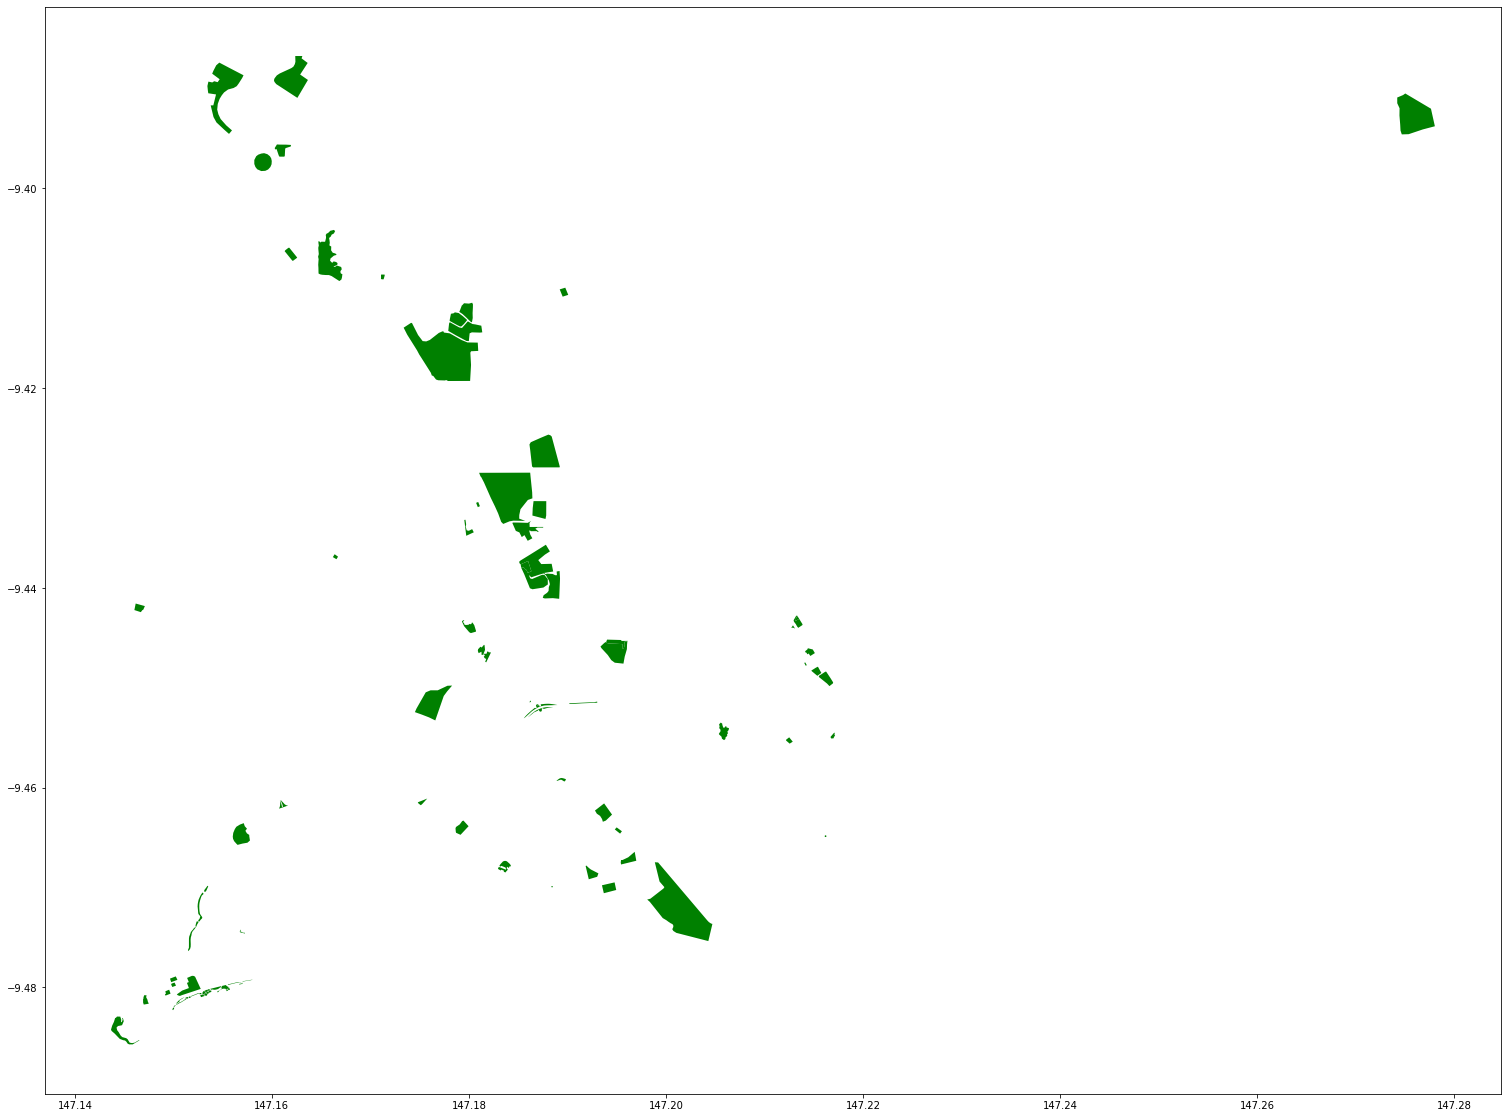

In [41]:
parks.plot(color="green",figsize=(30,20))

Finally, we can add the park polygons to our map:

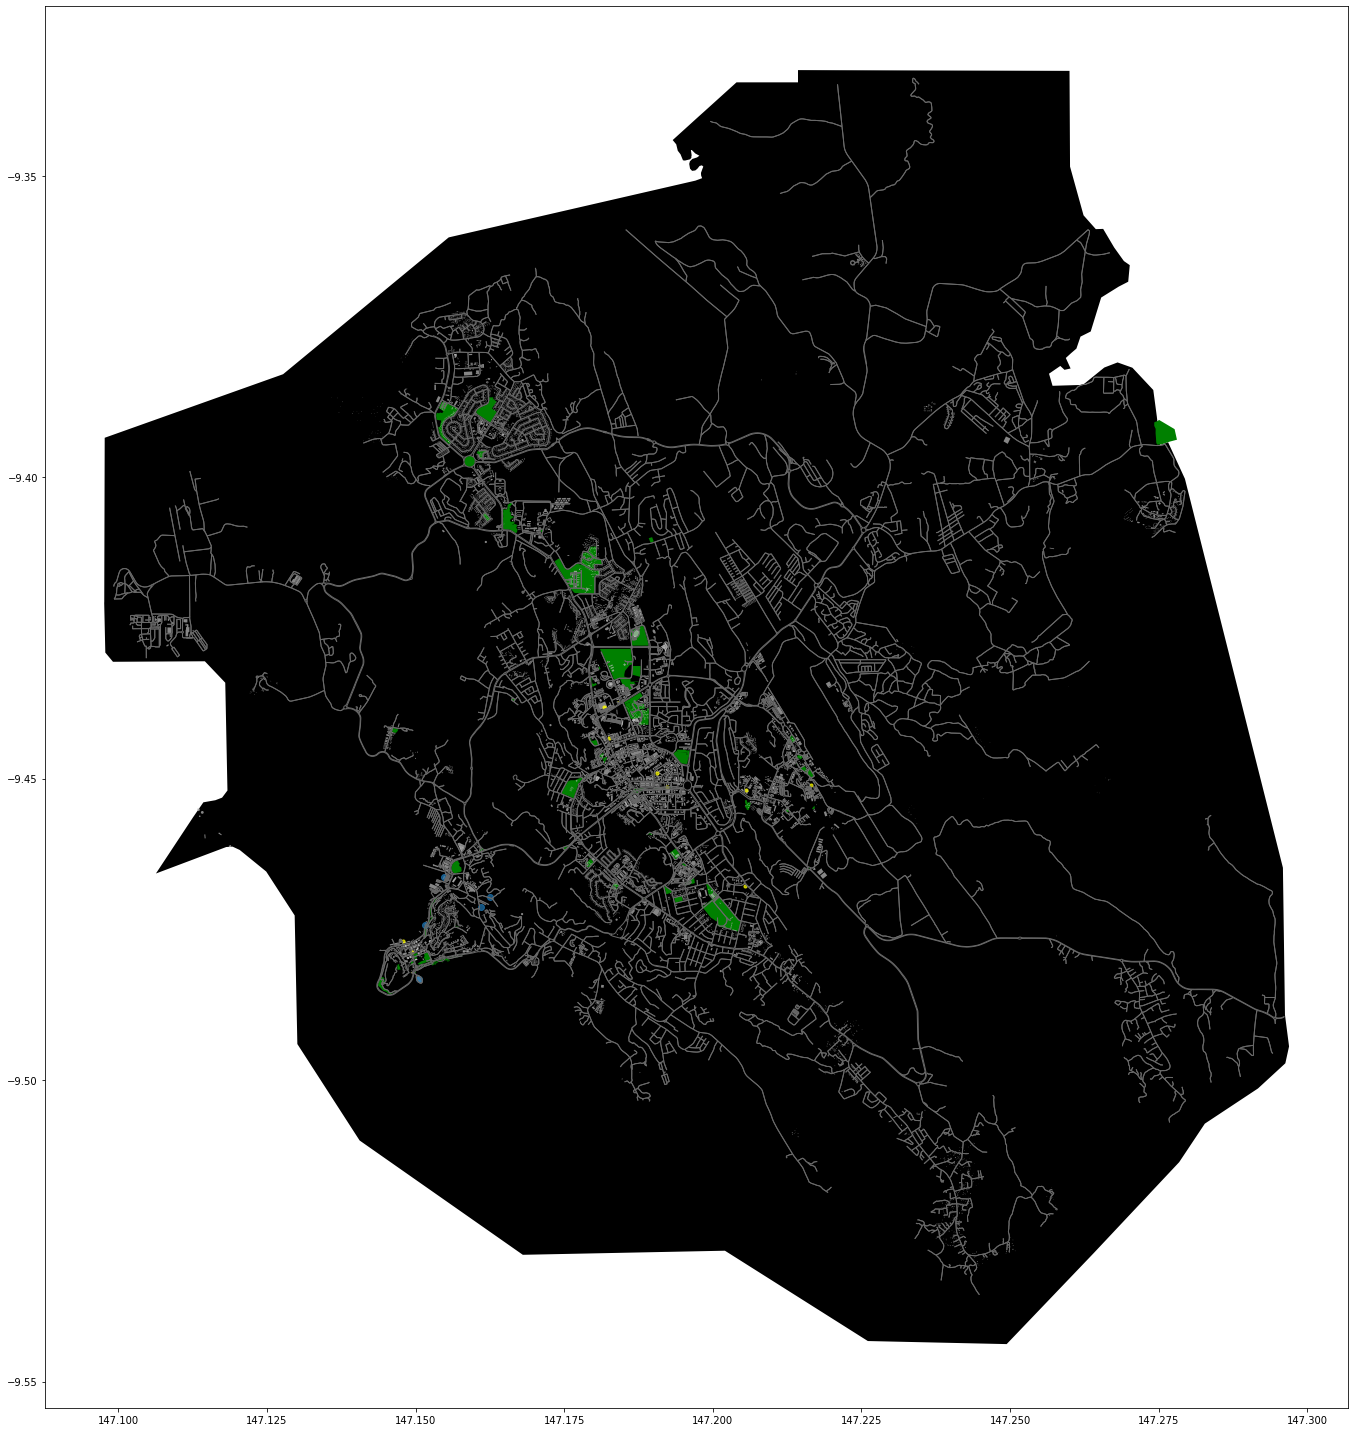

In [43]:
# Create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(30,20))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

<div class="alert alert-info">

**Check your understading**

Retrieve OpenStreetMap data from some other area! Download these elements using OSMnx functions from your area of interest:
    
- Extent of the area using `geocode_to_gdf()`
- Street network using `graph_from_place()`, and convert to gdf using `graph_to_gdfs()`
- Building footprints (and other geometries) using `geometries_from_place()` and appropriate tags.
    
*Note, the larger the area you choose, the longer it takes to retrieve data from the API! Use parameter `network_type=drive` to limit the graph query to filter out un-driveable roads.*

</div>

In [ ]:
# Specify the name that is used to seach for the data. Check that the place name is valid from https://nominatim.openstreetmap.org/ui/search.html
my_place = ""

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get street network


In [ ]:
# Get building footprints


In [ ]:
# Plot the data


### Advanced reading

If analyzing OpenStreetMap data over large areas, it is often more efficient and meaningful to download the data all at once, in stead of separate queries to the API. Such data dumps from OpenStreetMap are available in various file formats, OSM [Protocolbuffer Binary Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) being one of them. Data extracts covering whole countries and continents are available at: https://download.geofabrik.de/europe.html

[Pyrosm](https://pyrosm.readthedocs.io/en/latest/) is a python package developed for reading OpenStreetMap from PBF -files into Geopandas GeoDataFrames. Pyrosm makes it easy to extract road networks, buildings, Points of Interest (POI), landuse, natural elements, administrative boundaries and much more - similar to osmnx but more efficient when analyzing data covering large areas of interest. While osmnx reads the data from the Overpass API, pyrosm reads the data from a .pbf file that can be located on your local computer (faster!). 

Read more about fetching and using pbf files as a source for analyzing OpenStreetMap data in Python from the [pyrosm documentation](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).